# 1. Load Data

In [225]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [226]:
# read source data
data_lc = pd.read_csv(r'C:\Users\cheng\NewProjects\Capstone2\Raw_data\accepted_2007_to_2018Q4.csv')

C:\Users\cheng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We want to check how big is our data.

In [227]:
data_lc.shape

(2260701, 151)

Phwwww... Pretty huge data! with more than 2.2 million rows and 151 columns! That makes us feel that we have to move a huge rock! Keep in mind that we surely need to reduce the size of this data. How? We will first both remove columns and rows which is less important to our model. This will be done later. First let's see features of our data.

In [228]:
data_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


The head of the data shows us the column names and what the values look like. We already saw some missing data marked as "NaN". Now let's dig deeper into missing values.

We create a DataFrame to show the amount of missing values in each columns and also the percentage of missing values.

# 2. Check missing value and remove columns with too many missing values

In [229]:
missing = pd.concat([data_lc.isnull().sum(), 100 * data_lc.isnull().mean()], axis=1)
missing.columns = ['Count', '%']

The default display row number is changed to 200 to show all the data as we requested. So that no values will be shows as '...'

In [230]:
pd.options.display.max_rows = 200

Let's see the list of columns with best quality, with less than 10% missing values.

In [231]:
missing[missing['%']<10].sort_values('%')

,Count,%
id,0,0.000000
revol_bal,33,0.001460
initial_list_status,33,0.001460
out_prncp,33,0.001460
out_prncp_inv,33,0.001460
total_pymnt,33,0.001460
total_pymnt_inv,33,0.001460
total_rec_prncp,33,0.001460
total_rec_int,33,0.001460
fico_range_high,33,0.001460


And also the columns with bad quality have to be shown. They are at risk to be removed!

In [232]:
missing[missing['%']>10].sort_values('%')

,Count,%
mths_since_recent_inq,295468,13.069751
inq_fi,866162,38.313868
max_bal_bc,866162,38.313868
open_rv_24m,866162,38.313868
open_rv_12m,866162,38.313868
total_bal_il,866162,38.313868
open_act_il,866162,38.313868
open_il_12m,866162,38.313868
open_il_24m,866162,38.313868
inq_last_12m,866163,38.313912


We see some columns have more than 90% missing values. They are almost empty! Let's see how many columns have more than 10% missing value.

In [233]:
missing[missing['%']>10].count()

Count    59
%        59
dtype: int64

It shows that there are 58 columns have more than 30% missing values, a little bit more than 1/3 of total columns. Since we need to reduce our data size, they are the meat which faces a sharp knife. Maybe they don't want to be removed, but we have to. So let's do it!

In [234]:
drop_columns_1 = missing[missing['%']>10].index

In [235]:
data_lc = data_lc.drop(columns = drop_columns_1)

Let's clean hands and wipe sweat. Then have a look how much data left.

In [236]:
data_lc.shape

(2260701, 92)

We would like to list remaining columns.

In [237]:
data_lc.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [238]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 92 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                

# 3. Check correlations among numerical features and remove high correlated columns

We believe that there might be high correlation between some columns, and we can remove columns with high correlation to other columns to make our model simpler.

In [239]:
cor = data_lc.corr().abs()
unstack_corr = cor.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

In [240]:
corr_pairs[corr_pairs['corr']>0.8]

,feature1,feature2,corr
0,loan_amnt,loan_amnt,1.000000
1,fico_range_high,fico_range_low,1.000000
2,out_prncp,out_prncp_inv,0.999999
3,loan_amnt,funded_amnt,0.999755
4,total_pymnt,total_pymnt_inv,0.999396
5,funded_amnt,funded_amnt_inv,0.999341
6,loan_amnt,funded_amnt_inv,0.999038
7,num_sats,open_acc,0.998966
8,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.983638
9,tot_hi_cred_lim,tot_cur_bal,0.975582


In [241]:
drop_columns_2 = ['fico_range_low','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','open_acc','num_rev_tl_bal_gt_0','tot_cur_bal','collection_recovery_fee','total_rec_prncp','installment','total_il_high_credit_limit','bc_util','last_fico_range_high','bc_open_to_buy','num_rev_accts','num_bc_sats','num_op_rev_tl','avg_cur_bal','num_actv_rev_tl','total_rev_hi_lim','num_rev_tl_bal_gt_0','num_tl_30dpd']

In [242]:
data_lc = data_lc.drop(columns = drop_columns_2)

In [243]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 70 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   term                        object 
 3   int_rate                    float64
 4   grade                       object 
 5   sub_grade                   object 
 6   emp_title                   object 
 7   emp_length                  object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  url                         object 
 15  purpose                     object 
 16  title                       object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

#### 4. Check correlation between target column and other numerical columns and drop columns with poor correlation

Now we would like to continue to remove a few more columns. Since our target is column 'loan_status', we would like 
to see the correlations between column 'loan_status' and all other numerical columns, and remove those with poor correlation.

In [244]:
data_lc['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

We would like to change 'Does not meet the credit policy. Status:Fully Paid' to 'Fully Paid ', and 'Does not meet 
the credit policy. Status:Charged Off' to 'Charged Off'. And remove all other rows with other values in this column.
There are large amount of loans with status 'current', which means the payment is on going well and we don't know if
they will be fully paid or charged off. They are of no use to our model so we will remove those rows.

In [245]:
data_lc.loc[data_lc['loan_status']=='Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'Charged Off'
data_lc.loc[data_lc['loan_status']=='Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'Fully Paid'

In [246]:
data_lc['loan_status'].value_counts()

Fully Paid            1078739
Current                878317
Charged Off            269320
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: loan_status, dtype: int64

In [247]:
data_lc = data_lc[data_lc['loan_status'].isin(['Charged Off','Fully Paid'])]

In [248]:
data_lc['loan_status'].value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

We would like to change 'Fully Paid' to 1, and 'Charged Off' to 0, and set them to be categorical.

In [249]:
data_lc.loc[data_lc['loan_status']=='Fully Paid','loan_status'] = 1
data_lc.loc[data_lc['loan_status']=='Charged Off','loan_status'] = 0

In [250]:
data_lc['loan_status'].value_counts()

1    1078739
0     269320
Name: loan_status, dtype: int64

In [251]:
data_lc['loan_status'] = data_lc['loan_status'].astype('category')

In [252]:
data_lc['loan_status'].value_counts()

1    1078739
0     269320
Name: loan_status, dtype: int64

Let's list the names of columns with numerical values.

In [253]:
columns_dtype_is_float = data_lc.select_dtypes('float').columns

In [254]:
columns_dtype_is_float

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object')

Let's calculate the correlation between column 'loan_status' and all other numerical columns.

In [255]:
col_corr = []
data_lc_corr = []
for item in columns_dtype_is_float:
    data_lc_corr.append(abs(data_lc['loan_status'].corr(data_lc[item])))
    col_corr.append(item)

In [256]:
df_corr = pd.DataFrame({'column':col_corr, 'correlation':data_lc_corr})

In [257]:
df_corr.sort_values('correlation')

,column,correlation
21,tot_coll_amt,0.000446
36,num_tl_120dpd_2m,0.001295
24,delinq_amnt,0.002786
23,chargeoff_within_12_mths,0.003139
44,total_bal_ex_mort,0.003762
20,acc_now_delinq,0.003900
34,num_il_tl,0.006387
42,tax_liens,0.009683
37,num_tl_90g_dpd_24m,0.009896
31,num_accts_ever_120_pd,0.010384


We want to find all columns with a correlation smaller than 0.06

In [258]:
df_corr[df_corr['correlation']<0.06]['column']

2                     annual_inc
4                    delinq_2yrs
7                        pub_rec
8                      revol_bal
10                     total_acc
13                 total_rec_int
18    collections_12_mths_ex_med
20                acc_now_delinq
21                  tot_coll_amt
23      chargeoff_within_12_mths
24                   delinq_amnt
25            mo_sin_old_il_acct
26          mo_sin_old_rev_tl_op
27         mo_sin_rcnt_rev_tl_op
28                mo_sin_rcnt_tl
30          mths_since_recent_bc
31         num_accts_ever_120_pd
32                num_actv_bc_tl
33                     num_bc_tl
34                     num_il_tl
35                      num_sats
36              num_tl_120dpd_2m
37            num_tl_90g_dpd_24m
39                pct_tl_nvr_dlq
41          pub_rec_bankruptcies
42                     tax_liens
44             total_bal_ex_mort
Name: column, dtype: object

We see the highest correlation is found at column 'last_fico_range_low'. We are curious to see the distribution of all values in this column when 'loan_status' = 1 and 'loan_status' = 0 respectively.

<AxesSubplot:xlabel='last_fico_range_low', ylabel='count'>

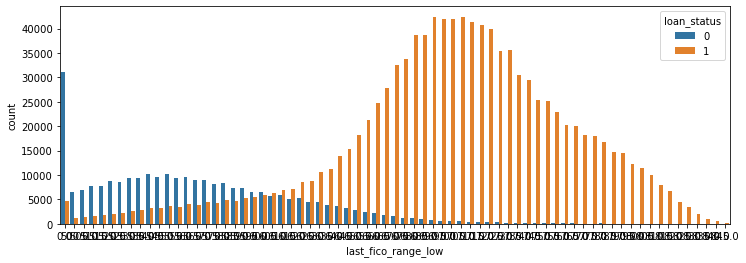

In [259]:
plt.figure(figsize=(12,4))
sns.countplot(x='last_fico_range_low', data = data_lc, hue='loan_status')

From the plot above, it is shown very clearly that the distribution of values in 'last_fico_range_low' are totally different when loan_status is different. Thus it is predicted that this column will play an important role in our 
modeling.

It is time to list columns with low correlation with 'loan_status' and remove them.

In [260]:
drop_columns_3 = ['delinq_2yrs', 'pub_rec', 'revol_bal', 'total_acc', 'total_rec_int', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'total_bal_ex_mort']

In [261]:
data_lc = data_lc.drop(columns = drop_columns_3)

In [262]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 44 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1348059 non-null  object  
 1   loan_amnt             1348059 non-null  float64 
 2   term                  1348059 non-null  object  
 3   int_rate              1348059 non-null  float64 
 4   grade                 1348059 non-null  object  
 5   sub_grade             1348059 non-null  object  
 6   emp_title             1262115 non-null  object  
 7   emp_length            1269514 non-null  object  
 8   home_ownership        1348059 non-null  object  
 9   annual_inc            1348055 non-null  float64 
 10  verification_status   1348059 non-null  object  
 11  issue_d               1348059 non-null  object  
 12  loan_status           1348059 non-null  category
 13  pymnt_plan            1348059 non-null  object  
 14  url               

Ok we already removed quite a few columns with missing values and others with numerical data. Now let's see those
columns with object values.

##### 5. check columns with object values and remove those with large amount of unique values

We saw some data type is object, and we would like to take a closer look on those columns and maybe we could drop a few more.

In [263]:
columns_dtype_is_object = data_lc.select_dtypes('object').columns

In [264]:
columns_dtype_is_object

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [265]:
len(columns_dtype_is_object)

23

They are totally 23 columns with object type values. We need to study them one by one and also change their values to be categorical to make our further study easier.

In [266]:
data_lc['id'].unique()

array([68407277, 68355089, 68341763, ..., '89996426', '90006534',
       '88224441'], dtype=object)

There are too many unique values in column 'id'. Actually we doubt that every row has a unique value. There is no way this column will have impact on our model so let's put it in our 'will-drop' list.

In [267]:
data_lc['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [268]:
data_lc['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [269]:
data_lc['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

'term' only has a few values and we believe it is important to our model. So let's keep it and change it to categorical value. 'sub_grade' is blieved to include 'grade' so we will keep 'sub_grade' and drop 'grade'.

In [270]:
data_lc.loc[data_lc['term']==' 36 months', 'term'] = 0
data_lc.loc[data_lc['term']==' 60 months', 'term'] = 1

In [271]:
data_lc['term'].unique()

array([0, 1], dtype=object)

In [272]:
data_lc['emp_title'].nunique()

379858

In [273]:
data_lc['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

Let's also set employment length to be categorical. 

In [274]:
data_lc.loc[data_lc['emp_length']=='10+ years', 'emp_length'] = 11
data_lc.loc[data_lc['emp_length']=='9 years', 'emp_length'] = 9
data_lc.loc[data_lc['emp_length']=='8 years', 'emp_length'] = 8
data_lc.loc[data_lc['emp_length']=='7 years', 'emp_length'] = 7
data_lc.loc[data_lc['emp_length']=='6 years', 'emp_length'] = 6
data_lc.loc[data_lc['emp_length']=='5 years', 'emp_length'] = 5
data_lc.loc[data_lc['emp_length']=='4 years', 'emp_length'] = 4
data_lc.loc[data_lc['emp_length']=='3 years', 'emp_length'] = 3
data_lc.loc[data_lc['emp_length']=='2 years', 'emp_length'] = 2
data_lc.loc[data_lc['emp_length']=='1 year', 'emp_length'] = 1
data_lc.loc[data_lc['emp_length']=='< 1 year', 'emp_length'] = 0

In [275]:
data_lc['emp_length'].unique()

array([11, 3, 4, 6, 7, 8, 2, 5, 9, 0, 1, nan], dtype=object)

In [276]:
data_lc['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [277]:
data_lc.loc[data_lc['home_ownership']=='NONE', 'home_ownership'] = 0
data_lc.loc[data_lc['home_ownership']=='OTHER', 'home_ownership'] = 1
data_lc.loc[data_lc['home_ownership']=='ANY', 'home_ownership'] = 2
data_lc.loc[data_lc['home_ownership']=='RENT', 'home_ownership'] = 3
data_lc.loc[data_lc['home_ownership']=='MORTGAGE', 'home_ownership'] = 4
data_lc.loc[data_lc['home_ownership']=='OWN', 'home_ownership'] = 5

In [278]:
data_lc['home_ownership'].unique()

array([4, 3, 5, 2, 0, 1], dtype=object)

In [279]:
data_lc['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [280]:
data_lc.loc[data_lc['verification_status']=='Not Verified', 'verification_status'] = 0
data_lc.loc[data_lc['verification_status']=='Source Verified', 'verification_status'] = 1
data_lc.loc[data_lc['verification_status']=='Verified', 'verification_status'] = 2

In [281]:
data_lc['verification_status'].unique()

array([0, 1, 2], dtype=object)

In [282]:
data_lc['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'Oct-20

'issue_d' has large amount of unique values and we don't think they will have impact to our model. So we will remove it.

In [283]:
data_lc['pymnt_plan'].unique()

array(['n'], dtype=object)

After some rows are removed, there is only single value left in column 'pymnt_plan'. So it also should be removed.

In [284]:
data_lc['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [285]:
data_lc.loc[data_lc['purpose']=='debt_consolidation', 'purpose'] = 0
data_lc.loc[data_lc['purpose']=='small_business', 'purpose'] = 1
data_lc.loc[data_lc['purpose']=='home_improvement', 'purpose'] = 2
data_lc.loc[data_lc['purpose']=='major_purchase', 'purpose'] = 3
data_lc.loc[data_lc['purpose']=='credit_card', 'purpose'] = 4
data_lc.loc[data_lc['purpose']=='other', 'purpose'] = 5
data_lc.loc[data_lc['purpose']=='house', 'purpose'] = 6
data_lc.loc[data_lc['purpose']=='vacation', 'purpose'] = 7
data_lc.loc[data_lc['purpose']=='car', 'purpose'] = 8
data_lc.loc[data_lc['purpose']=='medical', 'purpose'] = 9
data_lc.loc[data_lc['purpose']=='moving', 'purpose'] = 10
data_lc.loc[data_lc['purpose']=='renewable_energy', 'purpose'] = 11
data_lc.loc[data_lc['purpose']=='wedding', 'purpose'] = 12
data_lc.loc[data_lc['purpose']=='educational', 'purpose'] = 13

In [286]:
data_lc['purpose'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object)

In [287]:
data_lc['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [288]:
data_lc['title'].nunique()

63152

In [289]:
data_lc['zip_code'].nunique()

945

There all too many unique values in 'title' and 'zip_code', which indicate that they have very little influence to our
model. So we will remove them.

In [290]:
data_lc['addr_state'].unique()

array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
       'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
       'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'HI', 'VT', 'NJ', 'DE', 'TN',
       'NH', 'NE', 'OR', 'CT', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

In [291]:
data_lc['earliest_cr_line'].unique()

array(['Aug-2003', 'Dec-1999', 'Aug-2000', 'Jun-1998', 'Oct-1987',
       'Jun-1990', 'Feb-1999', 'Apr-2002', 'Nov-1994', 'Jun-1996',
       'Jun-2005', 'May-1984', 'Dec-2001', 'Nov-1993', 'Mar-2005',
       'May-2004', 'Jun-1991', 'May-2000', 'Oct-2011', 'May-1994',
       'Jul-2011', 'May-1991', 'May-2001', 'Jun-2002', 'Dec-1985',
       'Apr-2007', 'Feb-2002', 'Jun-2001', 'Oct-1996', 'Jan-2005',
       'Jul-2001', 'Aug-2004', 'Jun-2007', 'Jul-2004', 'Apr-2001',
       'May-1992', 'Oct-1999', 'Nov-2001', 'Jan-2001', 'Sep-2004',
       'Sep-2006', 'Oct-2002', 'Feb-1990', 'Aug-1987', 'Oct-1998',
       'Aug-2001', 'Feb-2004', 'Aug-2009', 'Jan-1999', 'Jun-2000',
       'Jan-2007', 'Aug-1997', 'Dec-1987', 'Feb-1996', 'Jun-2004',
       'Jun-1995', 'Oct-2004', 'Dec-2002', 'Aug-1986', 'Nov-2002',
       'Oct-2006', 'Sep-2000', 'Feb-2012', 'Apr-2005', 'Sep-1994',
       'Apr-1993', 'Sep-2007', 'Jan-1998', 'May-2008', 'Mar-2001',
       'Apr-1994', 'Apr-2003', 'Jan-2002', 'Jan-2011', 'Nov-20

In [292]:
data_lc['earliest_cr_line'].nunique()

739

In [293]:
data_lc['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [294]:
data_lc['last_pymnt_d'].unique()

array(['Jan-2019', 'Jun-2016', 'Jun-2017', 'Jul-2016', 'May-2017',
       'Nov-2016', 'Jan-2017', 'Aug-2018', 'Apr-2017', 'Mar-2017',
       'Feb-2018', 'Sep-2016', 'Mar-2016', 'May-2016', 'Sep-2017',
       'Dec-2017', 'Nov-2018', 'Oct-2018', 'Aug-2016', 'Dec-2018',
       'Dec-2016', 'Nov-2017', 'Mar-2018', 'Aug-2017', 'Mar-2019',
       'Jul-2017', 'Feb-2017', 'Feb-2019', 'Oct-2016', 'Sep-2018',
       'Oct-2017', 'Apr-2018', 'May-2018', 'Apr-2016', 'Jan-2018',
       'Jul-2018', 'Jun-2018', 'Feb-2016', 'Jan-2016', nan, 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Apr-2013', 'Apr-2012', 'Nov-2012',
       'Jun-2013', 'Sep-2013', 'Jul-2012', 'Oct-2013', 'May-2013',
       'Oct-2012', 'Sep-2012', 'Dec-2012', 'Aug-2013', 'N

In [295]:
data_lc['last_credit_pull_d'].unique()

array(['Mar-2019', 'Mar-2018', 'May-2017', 'Nov-2018', 'Sep-2018',
       'Nov-2017', 'Aug-2018', 'Apr-2017', 'Jun-2016', 'Jan-2018',
       'Sep-2017', 'Dec-2017', 'Jul-2016', 'Jan-2019', 'Jun-2017',
       'Feb-2019', 'Dec-2018', 'Feb-2018', 'Aug-2017', 'Feb-2017',
       'May-2018', 'Dec-2016', 'Apr-2018', 'Jul-2018', 'Mar-2016',
       'Jun-2018', 'Oct-2017', 'Jul-2017', 'Oct-2018', 'Jan-2017',
       'Oct-2016', 'Apr-2016', 'Mar-2017', 'Aug-2016', 'Feb-2016',
       'Nov-2016', 'Sep-2016', 'Jan-2016', 'Dec-2015', 'May-2016', nan,
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Jan-2014', 'Sep-2012', 'Jun-2012',
       'Dec-2012', 'Feb-2013', 'Feb-2012', 'Nov-2013', 'Apr-2012',
       'May-2013', 'Aug-2012', 'Sep-2013', 'Jan-2012', 'O

In [296]:
data_lc['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [297]:
data_lc['hardship_flag'].unique()

array(['N'], dtype=object)

Like 'pymnt_plan', 'hardship_flag' also has only one value left. Let's remove it.

In [298]:
data_lc['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [299]:
data_lc['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [300]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 44 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1348059 non-null  object  
 1   loan_amnt             1348059 non-null  float64 
 2   term                  1348059 non-null  object  
 3   int_rate              1348059 non-null  float64 
 4   grade                 1348059 non-null  object  
 5   sub_grade             1348059 non-null  object  
 6   emp_title             1262115 non-null  object  
 7   emp_length            1269514 non-null  object  
 8   home_ownership        1348059 non-null  object  
 9   annual_inc            1348055 non-null  float64 
 10  verification_status   1348059 non-null  object  
 11  issue_d               1348059 non-null  object  
 12  loan_status           1348059 non-null  category
 13  pymnt_plan            1348059 non-null  object  
 14  url               

In [301]:
drop_columns_4 = ['id','grade','issue_d','pymnt_plan','emp_title','title','earliest_cr_line','zip_code','last_pymnt_d','last_credit_pull_d','url','hardship_flag']

In [302]:
data_lc = data_lc.drop(columns = drop_columns_4)

We have dropped quite a few columns and now let's see what our new dataset look like. 

In [303]:
data_lc.shape

(1348059, 32)

In [304]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1348059 non-null  float64 
 1   term                  1348059 non-null  object  
 2   int_rate              1348059 non-null  float64 
 3   sub_grade             1348059 non-null  object  
 4   emp_length            1269514 non-null  object  
 5   home_ownership        1348059 non-null  object  
 6   annual_inc            1348055 non-null  float64 
 7   verification_status   1348059 non-null  object  
 8   loan_status           1348059 non-null  category
 9   purpose               1348059 non-null  object  
 10  addr_state            1348059 non-null  object  
 11  dti                   1347685 non-null  float64 
 12  fico_range_high       1348059 non-null  float64 
 13  inq_last_6mths        1348029 non-null  float64 
 14  revol_util        

There are total 1348059 rows and 32 columns. It is now much smaller than the original one. Now let's plot the correlation matrix and see how it looks like.

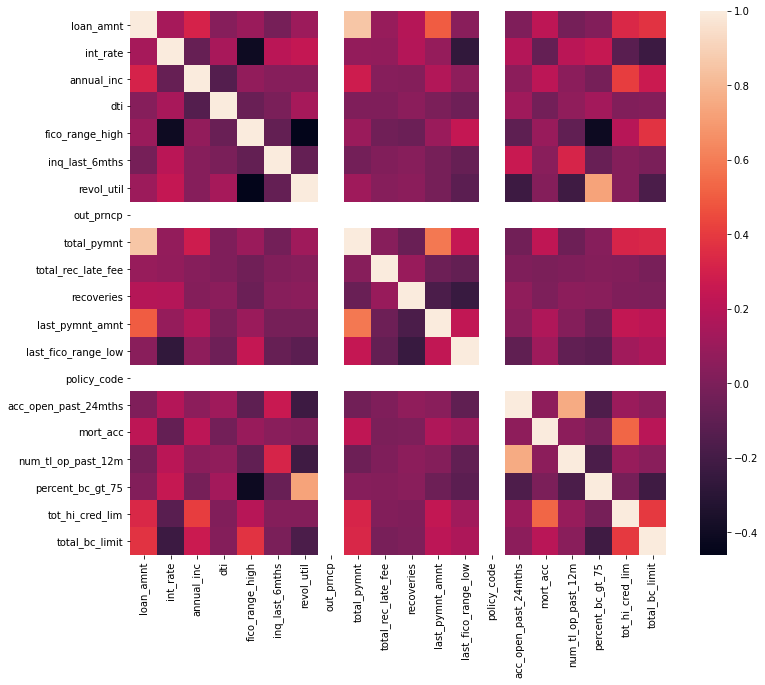

In [305]:
plt.subplots(figsize=(12,10))
sns.heatmap(data_lc.corr());

There are a few things which seems noticable. First, column 'policy_code' and 'out_prncp' is with no color. and the 
small square of 'loan_amnt' with 'total_pymnt' is very mild. We would like to have a look on them.

In [306]:
data_lc['policy_code'].unique()

array([1.])

In [307]:
data_lc['out_prncp'].unique()

array([0.])

In [308]:
data_lc['total_pymnt'].corr(data_lc['loan_amnt'])

0.8544069835539806

It shows that columns 'policy_code' and 'out_prncp' only has single value, correlation of 'total_pymnt' and 'loan_amnt' is with high correlation. 

We also realize 'verification_status' shows that if the customer's income is verified or not. For those not verified, Lender Club could go ahead and verify it. So it is not a feature about our customer. It should also be removed. 

Thus let's remove those four columns.

In [309]:
drop_columns_5 = ['total_pymnt','policy_code','out_prncp','verification_status']

In [310]:
data_lc = data_lc.drop(columns = drop_columns_5)

In [311]:
data_lc.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
sub_grade                   0
emp_length              78545
home_ownership              0
annual_inc                  4
loan_status                 0
purpose                     0
addr_state                  0
dti                       374
fico_range_high             0
inq_last_6mths             30
revol_util                897
initial_list_status         0
total_rec_late_fee          0
recoveries                  0
last_pymnt_amnt             0
last_fico_range_low         0
application_type            0
acc_open_past_24mths    50030
mort_acc                50030
num_tl_op_past_12m      70276
percent_bc_gt_75        64304
tot_hi_cred_lim         70276
total_bc_limit          50030
disbursement_method         0
debt_settlement_flag        0
dtype: int64

In [312]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1348059 non-null  float64 
 1   term                  1348059 non-null  object  
 2   int_rate              1348059 non-null  float64 
 3   sub_grade             1348059 non-null  object  
 4   emp_length            1269514 non-null  object  
 5   home_ownership        1348059 non-null  object  
 6   annual_inc            1348055 non-null  float64 
 7   loan_status           1348059 non-null  category
 8   purpose               1348059 non-null  object  
 9   addr_state            1348059 non-null  object  
 10  dti                   1347685 non-null  float64 
 11  fico_range_high       1348059 non-null  float64 
 12  inq_last_6mths        1348029 non-null  float64 
 13  revol_util            1347162 non-null  float64 
 14  initial_list_statu

In [313]:
data_lc = data_lc.dropna()

In [314]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188433 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1188433 non-null  float64 
 1   term                  1188433 non-null  object  
 2   int_rate              1188433 non-null  float64 
 3   sub_grade             1188433 non-null  object  
 4   emp_length            1188433 non-null  object  
 5   home_ownership        1188433 non-null  object  
 6   annual_inc            1188433 non-null  float64 
 7   loan_status           1188433 non-null  category
 8   purpose               1188433 non-null  object  
 9   addr_state            1188433 non-null  object  
 10  dti                   1188433 non-null  float64 
 11  fico_range_high       1188433 non-null  float64 
 12  inq_last_6mths        1188433 non-null  float64 
 13  revol_util            1188433 non-null  float64 
 14  initial_list_statu

All missing data have been removed. And our final dataset is with 1188433 rows and 28 columns.

In [317]:
categorical_columns = ['term','emp_length','home_ownership','purpose','initial_list_status','application_type','disbursement_method','debt_settlement_flag']

In [318]:
data_lc[categorical_columns] = data_lc[categorical_columns].astype('category')

In [319]:
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188433 entries, 0 to 2260697
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1188433 non-null  float64 
 1   term                  1188433 non-null  category
 2   int_rate              1188433 non-null  float64 
 3   sub_grade             1188433 non-null  object  
 4   emp_length            1188433 non-null  category
 5   home_ownership        1188433 non-null  category
 6   annual_inc            1188433 non-null  float64 
 7   loan_status           1188433 non-null  category
 8   purpose               1188433 non-null  category
 9   addr_state            1188433 non-null  object  
 10  dti                   1188433 non-null  float64 
 11  fico_range_high       1188433 non-null  float64 
 12  inq_last_6mths        1188433 non-null  float64 
 13  revol_util            1188433 non-null  float64 
 14  initial_list_statu

In [320]:
file_name = 'lending_club_data.csv'
data_lc.to_csv(file_name, index=False)